1- Abrindo a base de dados e importando as bibliotecas necessárias

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

arquivo = pd.read_csv("PDA_Dados_Cursos_Graduacao_Brasil.csv")

arquivo.head()

,CODIGO_IES,NOME_IES,CATEGORIA_ADMINISTRATIVA,ORGANIZACAO_ACADEMICA,CODIGO_CURSO,NOME_CURSO,GRAU,AREA_OCDE,MODALIDADE,SITUACAO_CURSO,QT_VAGAS_AUTORIZADAS,CARGA_HORARIA,CODIGO_AREA_OCDE_CINE,AREA_OCDE_CINE,CODIGO_MUNICIPIO,MUNICIPIO,UF,REGIAO
0,4751,CENTRO UNIVERSITÁRIO UNIFATECIE,Privada com fins lucrativos,Centro Universitário,1556773,ENGENHARIA AGRONÔMICA,Bacharelado,Agronomia,Educação a Distância,Em atividade,1000,4400,301,Agronomia,3541406,Presidente Prudente,SP,SUDESTE
1,1491,CENTRO UNIVERSITÁRIO INTERNACIONAL,Privada com fins lucrativos,Centro Universitário,1186955,LETRAS,Licenciatura,Formação de professor de língua/literatura ver...,Educação a Distância,Em atividade,3000,3992,58,Formação de professor de língua/literatura ver...,2516201,Sousa,PB,NORDESTE
2,1472,CENTRO UNIVERSITÁRIO LEONARDO DA VINCI,Privada com fins lucrativos,Centro Universitário,99950,GEOGRAFIA,Licenciatura,Formação de professor de geografia,Educação a Distância,Em atividade,7620,3500,39,Formação de professor de geografia,2800308,Aracaju,SE,NORDESTE
3,221,UNIVERSIDADE CRUZEIRO DO SUL,Privada com fins lucrativos,Universidade,1467998,EDUCAÇÃO FÍSICA,Bacharelado,Educação física,Educação a Distância,Em atividade,1200,3200,328,Educação física,4113205,Lapa,PR,SUL
4,1472,CENTRO UNIVERSITÁRIO LEONARDO DA VINCI,Privada com fins lucrativos,Centro Universitário,1516788,SERVIÇOS PENAIS,Tecnológico,NaN,Educação a Distância,Em atividade,1500,1980,357,Serviços penais,2601706,Belo Jardim,PE,NORDESTE


REGIAO
SUDESTE              347855
NORDESTE             202968
SUL                  188657
NORTE                 82770
CENTRO-OESTE          79818
IGNORADO/EXTERIOR       608
Name: count, dtype: int64

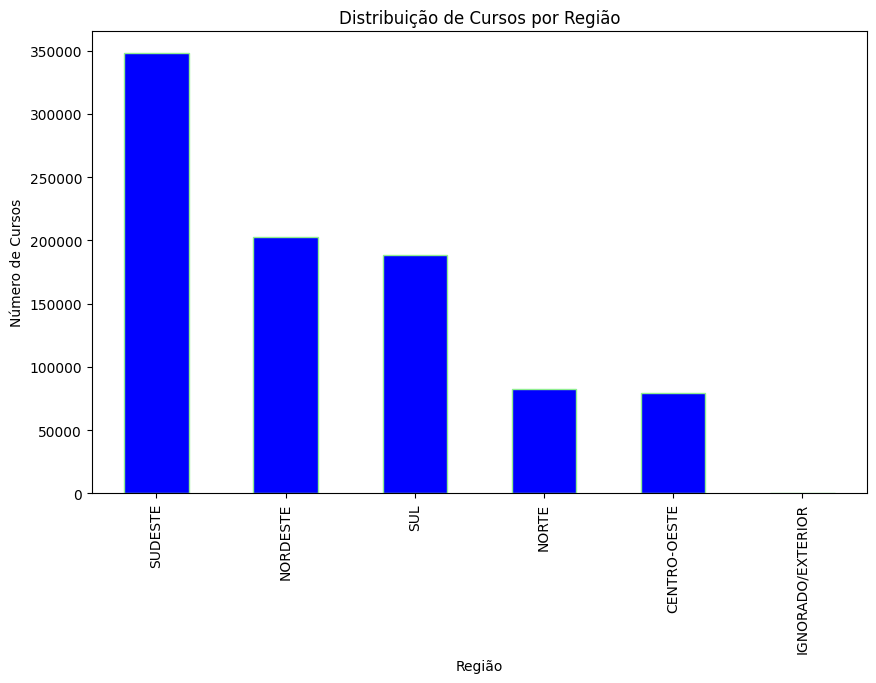

In [76]:

cursos_regiao = arquivo['REGIAO'].value_counts()

display(cursos_regiao)


plt.figure(figsize=(10, 6))

cursos_regiao.plot(kind='bar', color='blue', edgecolor='lightgreen')
plt.title('Distribuição de Cursos por Região')
plt.xlabel('Região')
plt.ylabel('Número de Cursos')
plt.savefig("grafico_cursosregiao", bbox_inches='tight')
plt.show()

REGIAO
SUDESTE              2333028227
NORDESTE             1218963125
SUL                   944563809
NORTE                 637651691
CENTRO-OESTE          620100529
IGNORADO/EXTERIOR       5854628
Name: QT_VAGAS_AUTORIZADAS, dtype: int64

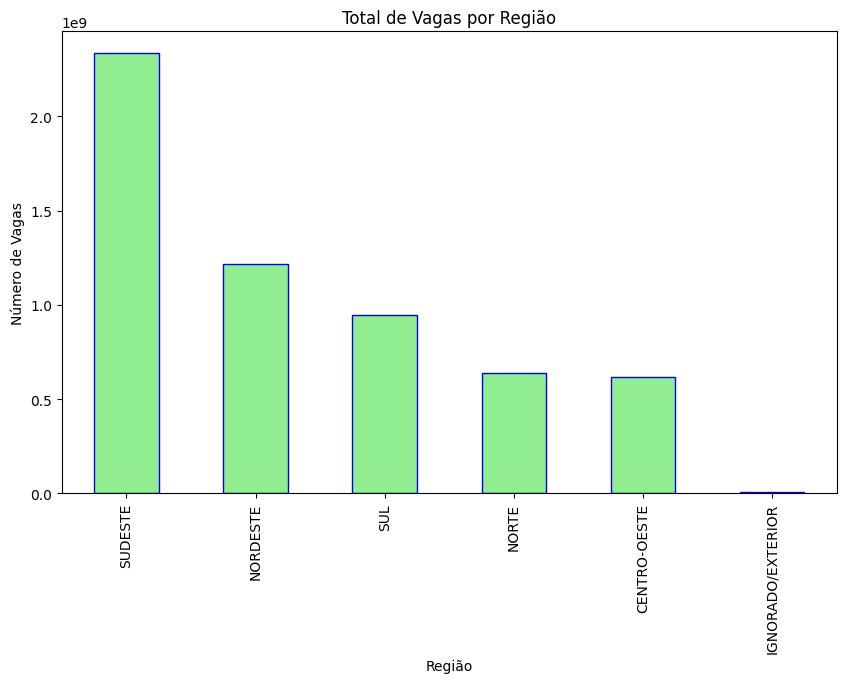

In [74]:
vagas_por_regiao = arquivo.groupby('REGIAO')['QT_VAGAS_AUTORIZADAS'].sum().sort_values(ascending=False)

display(vagas_por_regiao)

plt.figure(figsize=(10, 6))

vagas_por_regiao.plot(kind='bar', color='lightgreen', edgecolor='blue')
plt.title('Total de Vagas por Região')
plt.xlabel('Região')
plt.ylabel('Número de Vagas')
plt.savefig("graficosVagasregiao.png", bbox_inches='tight')
plt.show()

MODALIDADE,Educação Presencial,Educação a Distância
REGIAO,,
CENTRO-OESTE,6880,72938
IGNORADO/EXTERIOR,0,608
NORDESTE,14891,188077
NORTE,5514,77256
SUDESTE,32349,315506
SUL,13003,175654


<Figure size 1000x600 with 0 Axes>

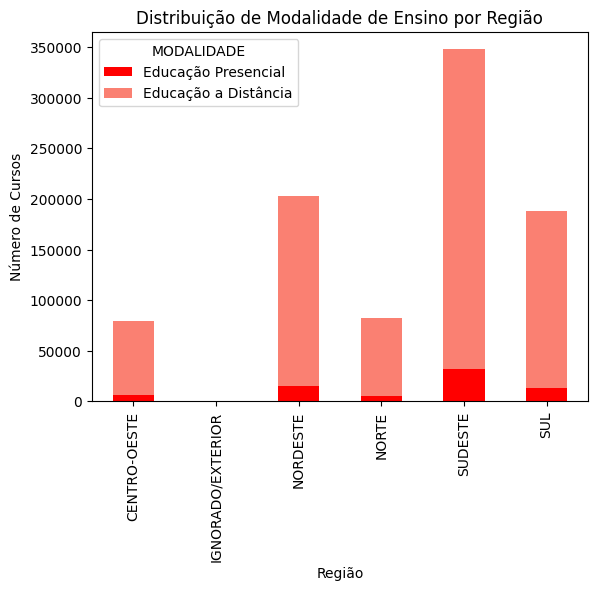

In [3]:
modalidade_por_regiao = pd.crosstab(arquivo['REGIAO'], arquivo['MODALIDADE'])

display(modalidade_por_regiao)


plt.figure(figsize=(10, 6))

modalidade_por_regiao.plot(kind='bar', stacked=True, color=['red', 'salmon'])
plt.title('Distribuição de Modalidade de Ensino por Região')
plt.xlabel('Região')
plt.ylabel('Número de Cursos')
plt.savefig("Gráfico_Modalidade_por_Região.png", bbox_inches='tight')
plt.show()

GRAU
Bacharelado                      1551091974
Licenciatura                     1304494277
Sequencial                            86806
Tecnológico                      2904488237
Área Básica de Ingresso (ABI)           715
Name: QT_VAGAS_AUTORIZADAS, dtype: int64

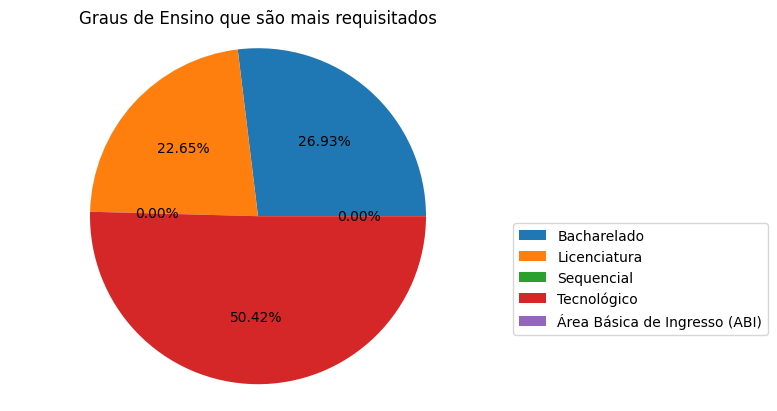

In [55]:
grau = arquivo.groupby('GRAU')['QT_VAGAS_AUTORIZADAS'].sum()
display(grau)

grau_nome = grau.index
vagas_grau = grau.values


plt.title("Graus de Ensino que são mais requisitados")
plt.pie(vagas_grau, autopct='%1.2f%%')

plt.legend([f'{vag}' for vag in grau_nome], 
title="", loc="best", bbox_to_anchor=(1, 0.5))

plt.axis('equal')

plt.savefig("GráficoGraus.png", bbox_inches='tight')

plt.show()

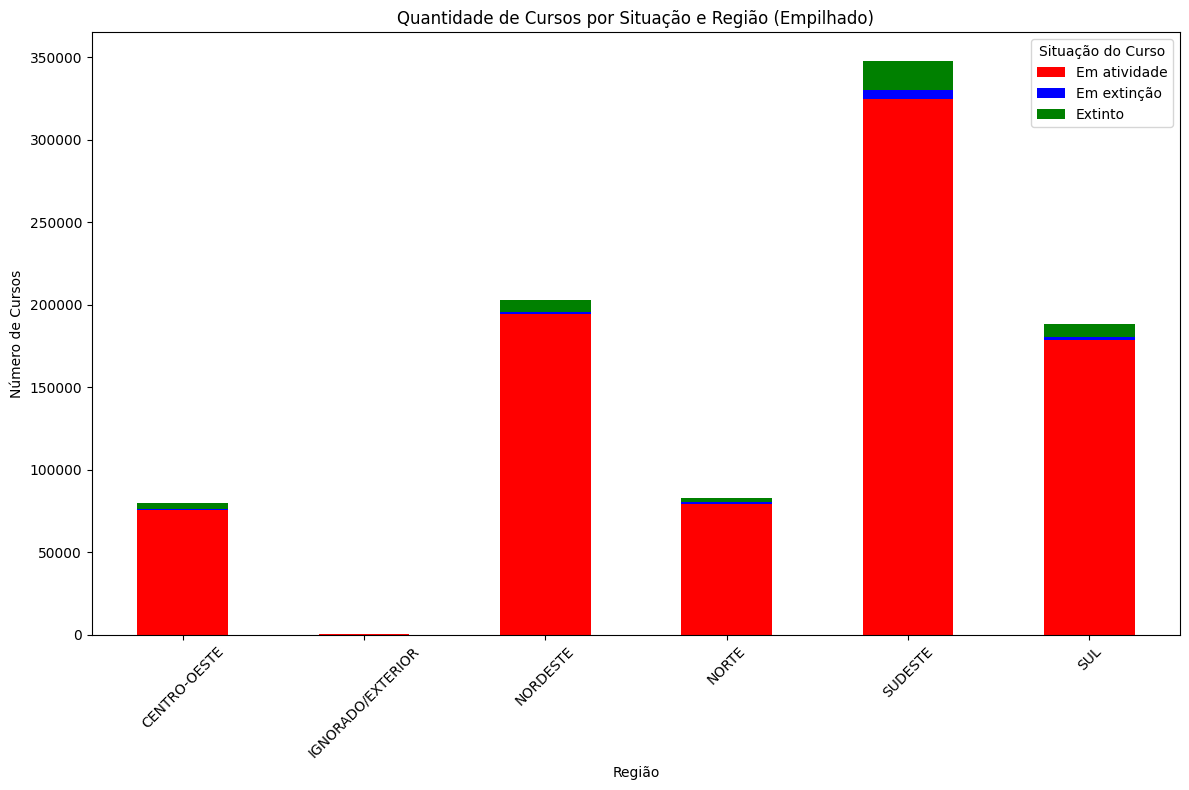

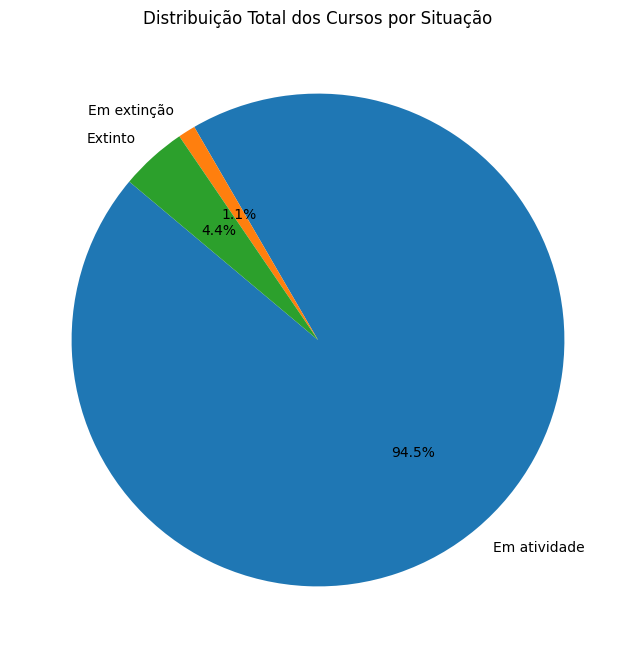

In [72]:

situacaodaregiao = pd.crosstab(arquivo['REGIAO'], arquivo['SITUACAO_CURSO'])



situacaodaregiao.plot(kind='bar', stacked=True, figsize=(12, 8), color=['red', 'blue', 'green'])
plt.title('Quantidade de Cursos por Situação e Região (Empilhado)')
plt.xlabel('Região')
plt.ylabel('Número de Cursos')
plt.xticks(rotation=45)
plt.legend(title='Situação do Curso')
plt.tight_layout()
plt.savefig("Gráfico_Situacao_por_Região.png", bbox_inches='tight')
plt.show()



total_por_situacao = situacaodaregiao.sum()


plt.figure(figsize=(8, 8) )
plt.pie(total_por_situacao, labels=total_por_situacao.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribuição Total dos Cursos por Situação')
plt.savefig("graficoSituacao", bbox_inches='tight')
plt.show()

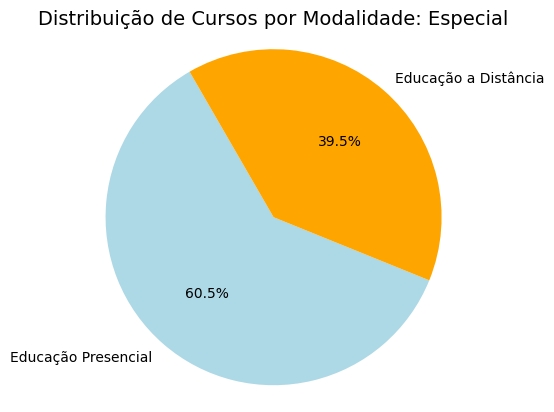

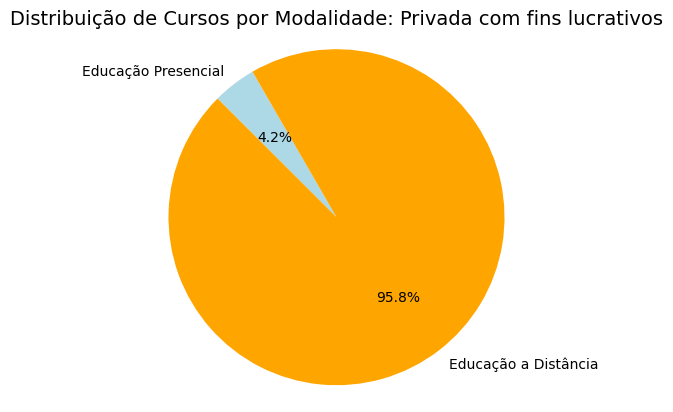

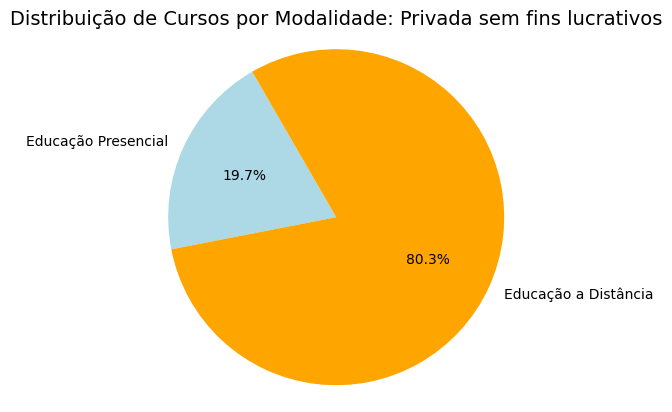

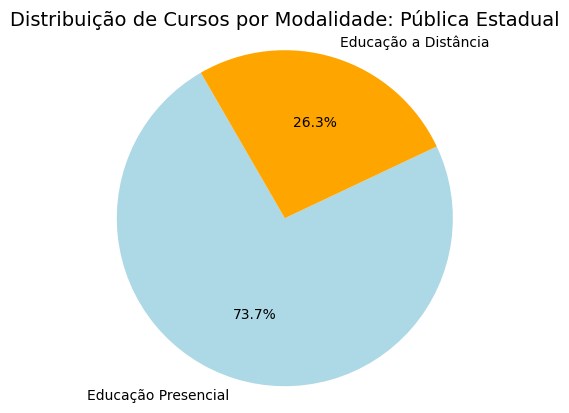

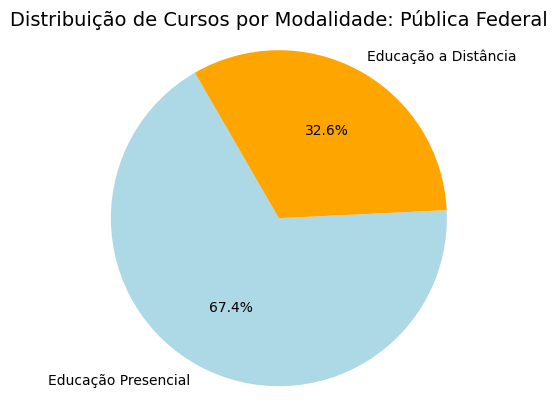

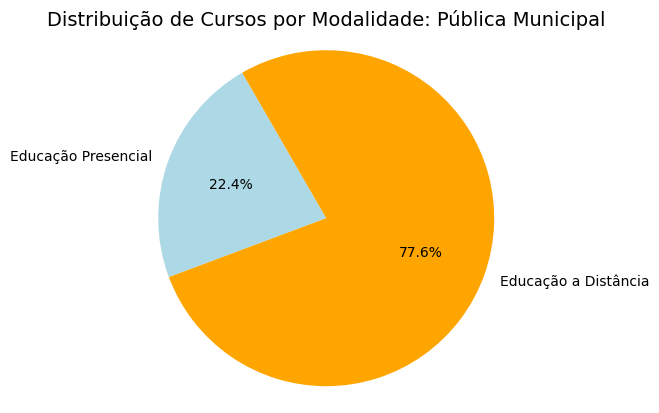

In [64]:

modalidade_categoria = pd.crosstab(arquivo['CATEGORIA_ADMINISTRATIVA'], arquivo['MODALIDADE'])

for categoria in modalidade_categoria.index:
    valores = modalidade_categoria.loc[categoria]
    
  
    plt.pie(
        valores, 
        labels=valores.index, 
        startangle=120, 
        colors=['lightblue', 'orange'],
        autopct='%1.1f%%', 
    )
    
    # Título do gráfico
    plt.title(f'Distribuição de Cursos por Modalidade: {categoria}', fontsize=14)
    plt.axis('equal')
    
    plt.savefig(f"graficoModalidade_{categoria}.png", bbox_inches='tight')
    plt.show()

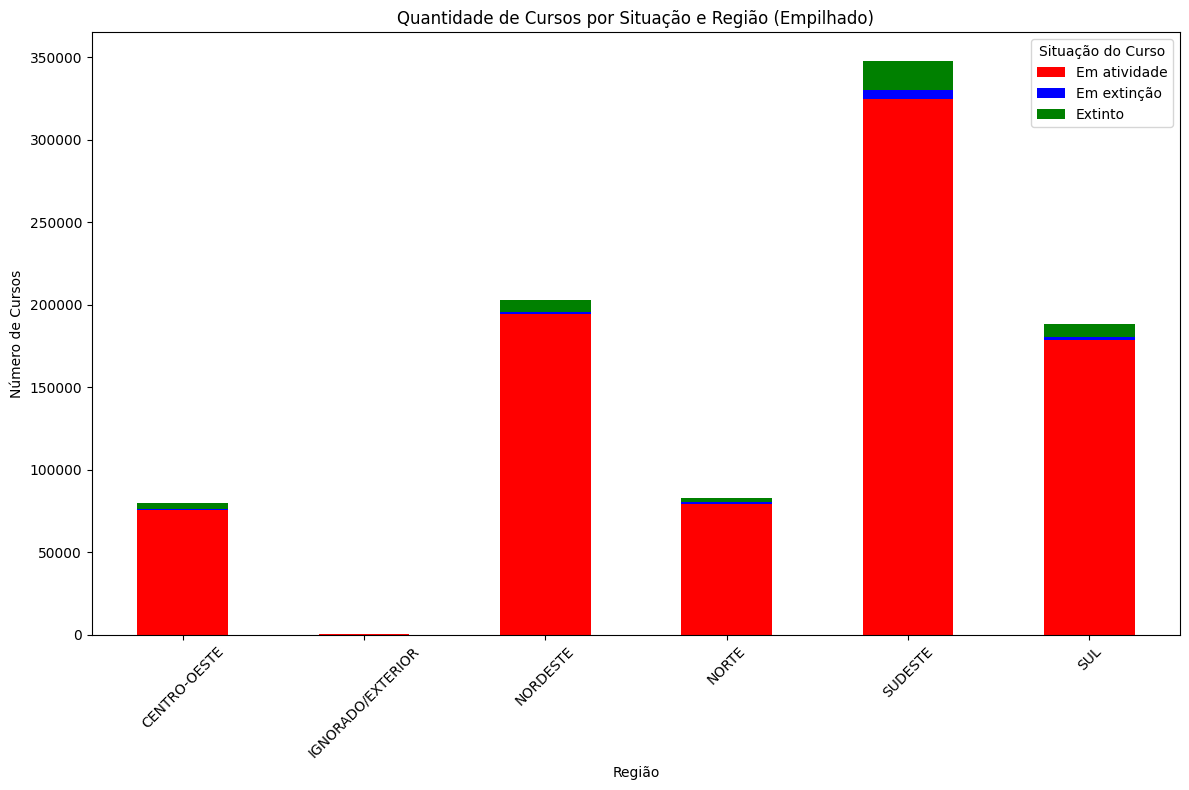

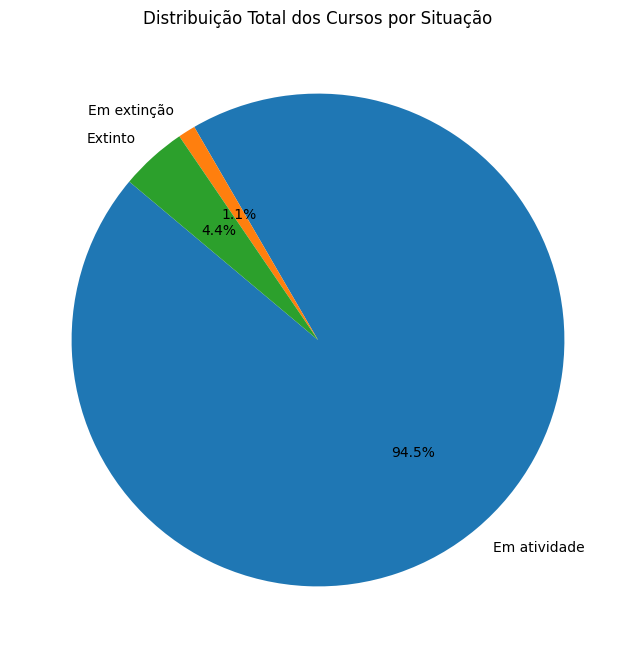